In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Download Data

In [2]:
housing = pd.read_csv("datasets/housing/housing.csv")

In [3]:
# Show data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
# Show data info
housing.info()
print("|As you can see, the ocean proximity is object. Therefore, it's much be categories type|")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
|As you can see, the ocean proximity is object. Therefore, it's much be categories type|


In [18]:
# See the values of ocean proximity
print(housing['ocean_proximity'].value_counts())
print('|Now, we can see each value of ocean proximity|')

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
|Now, we can see each value of ocean proximity|


In [19]:
# Let look at descriptive stat
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Interpreting Descriptive Statistics

The `describe()` method gives us key insights about our data:

- **count**: Number of non-null values (shows missing data)
- **mean**: Average value (center of the distribution)
- **std**: Standard deviation (spread/variability - larger = more spread out)
- **min/max**: Minimum and maximum values (range)
- **25%, 50% (median), 75%**: Percentiles (25% = 1st quartile, 50% = median, 75% = 3rd quartile)

### Key Insights to Look For:

1. **Missing Data**: Compare `count` to total rows (20640) - notice `total_bedrooms` has 20433 non-null values (207 missing)
2. **Outliers**: Large differences between `max` and `75%` may indicate outliers
3. **Distribution Shape**: Compare `mean` vs `median` (50%) - if very different, data is skewed
4. **Scale**: Check if features are on similar scales (affects ML algorithms)


This seems like it's skewed and not look like a bell shape.


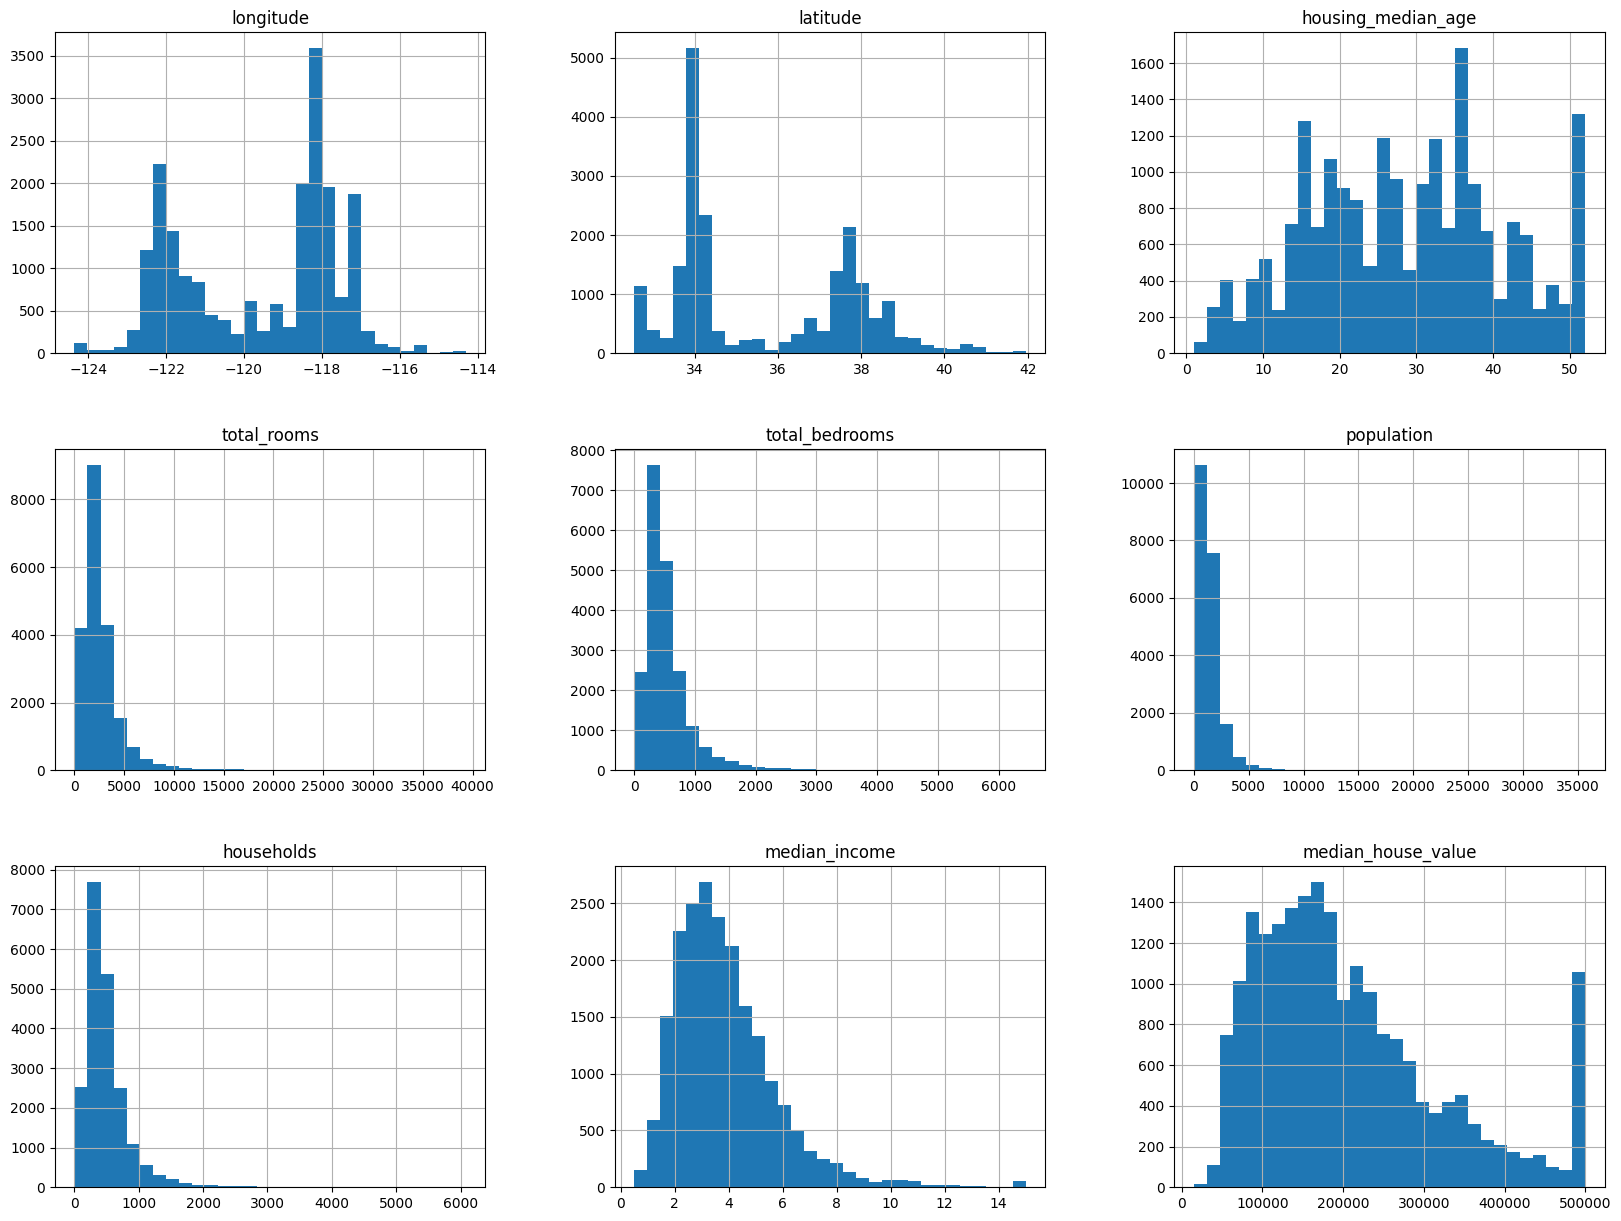

In [31]:
# Now, let's look at histogram
housing.hist(bins=30, figsize=(20, 15))
plt.plot()
print("This seems like it's skewed and not look like a bell shape.")

**Create a Test Set**

**train_test_split**

In [34]:
# Now, we need to create a Test Set
# Let's import sklearn library for split the dataset
from sklearn.model_selection import train_test_split

In [35]:
# use train_test_split()
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # train_test_split(dataset, size 0.2 mean split test set from total set 20%, random seed 42)


In [42]:
# numbers of observations of train set, test set
print(len(train_set),",",len(test_set))

16512 , 4128


**Stratified Sampling**

<Axes: >

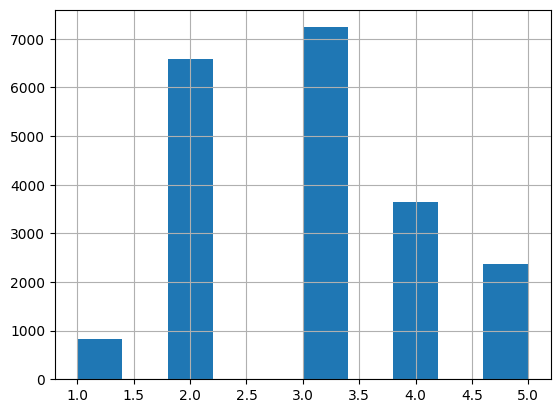

In [ ]:
# create an category attribute

housing["income_cat"] = pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5]) # np.inf means infinity
housing['income_cat'].hist()

In [56]:
# Stratified sampling based on the income category.
# Import library first.
from sklearn.model_selection import StratifiedShuffleSplit

In [58]:
# Do stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [67]:
print(len(train_index))
print(len(test_index))

16512
4128


**compare 2 sampling (normal vs. stratified sampling)**

In [94]:
train_set['income_cat'] = pd.cut(train_set['median_income'] ,bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

In [97]:
test_set['income_cat'] = pd.cut(test_set['median_income'] ,bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

Text(0.5, 1.0, 'Normal Train Set')

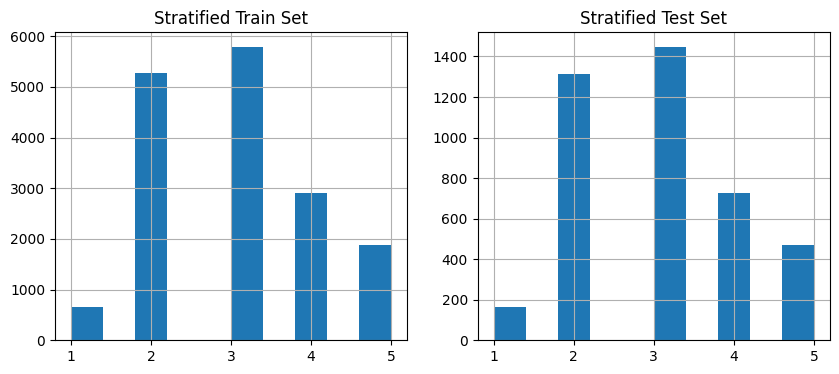

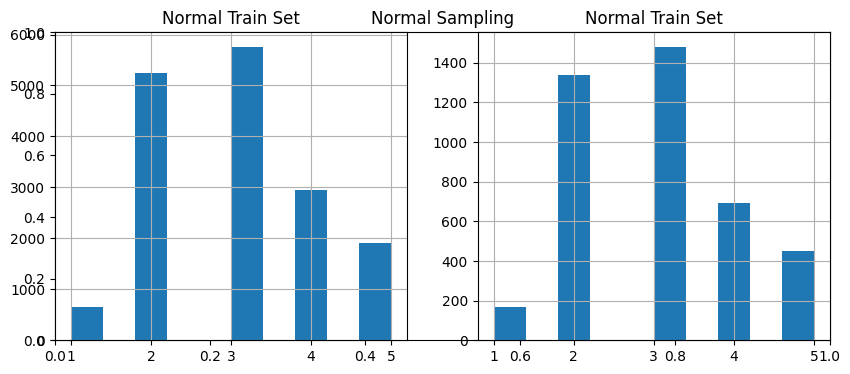

In [103]:
# Create big figure
plt.figure(figsize=(10,4))

# Create subplot 1 (A train set)
plt.subplot(1, 2, 1)
strat_train_set['income_cat'].hist()
plt.title("Stratified Train Set")

# Create subplot 2 (A test set)
plt.subplot(1,2,2)
strat_test_set['income_cat'].hist()
plt.title("Stratified Test Set")

plt.figure(figsize=(10,4))
plt.title("Normal Sampling")

plt.subplot(1,2,1)
train_set['income_cat'].hist()
plt.title('Normal Train Set')

plt.subplot(1,2,2)
test_set['income_cat'].hist()
plt.title('Normal Train Set')

**Compare proportions of each category**

In [108]:
# Overall
housing['income_cat'].value_counts()/len(housing['income_cat'])

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [115]:
# Normal Sampling
for a in [train_set, test_set, strat_train_set, strat_test_set]:
    print("Error")
    print((a['income_cat'].value_counts()/len(a['income_cat']) - housing['income_cat'].value_counts()/len(housing['income_cat'])))

print("We can see that stratified sampling gives us less error")

Error
income_cat
3   -0.001986
2   -0.001381
4    0.002229
5    0.001235
1   -0.000097
Name: count, dtype: float64
Error
income_cat
3    0.007946
2    0.005523
4   -0.008915
5   -0.004942
1    0.000388
Name: count, dtype: float64
Error
income_cat
3    0.000012
2    0.000012
4   -0.000012
5    0.000024
1   -0.000036
Name: count, dtype: float64
Error
income_cat
3   -0.000048
2   -0.000048
4    0.000048
5   -0.000097
1    0.000145
Name: count, dtype: float64
We can see that stratified sampling gives us less error
